In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning Lab Assignment/WineQuality-RedWine_naive.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [10]:
df['quality']=np.where(df['quality']>5,1,0)

In [11]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [12]:
df['quality'].value_counts()/len(df)*100

quality
1    53.470919
0    46.529081
Name: count, dtype: float64

In [13]:
target = df['quality']
df = df.drop(['quality'], axis = 1)

In [14]:
def z_scoreoutliers(x,lb,ub):
    zscore = ((x-x.mean())/x.std()).copy()
    outliers = pd.Series([0]*len(x))
    outliers[((zscore<lb)|(zscore>ub))] = 1
    return x[outliers[outliers == 1].index]

In [15]:
z_scoreoutliers(df["fixed acidity"],-3,3)


243    15.0
244    15.0
347    13.8
374    14.0
381    13.7
391    13.7
442    15.6
544    14.3
554    15.5
555    15.5
557    15.6
652    15.9
Name: fixed acidity, dtype: float64

In [16]:
outlier_index = []
for i in df.columns:
    print(i)
    print(list(z_scoreoutliers(df[i],-3,3).index))
    outlier_index.extend(z_scoreoutliers(df[i],-3,3).index)

fixed acidity
[243, 244, 347, 374, 381, 391, 442, 544, 554, 555, 557, 652]
volatile acidity
[38, 120, 126, 127, 199, 672, 690, 724, 1299, 1312]
citric acid
[151]
residual sugar
[33, 163, 164, 274, 324, 325, 396, 400, 480, 494, 595, 649, 652, 911, 917, 923, 1043, 1071, 1074, 1079, 1081, 1186, 1235, 1244, 1434, 1435, 1474, 1476, 1574, 1589]
chlorides
[17, 19, 42, 81, 83, 106, 147, 151, 169, 181, 226, 240, 258, 281, 291, 451, 568, 692, 730, 754, 776, 777, 1051, 1165, 1260, 1319, 1370, 1372, 1374, 1558, 1570]
free sulfur dioxide
[14, 15, 57, 396, 400, 584, 925, 926, 982, 1131, 1154, 1175, 1231, 1244, 1295, 1296, 1358, 1434, 1435, 1474, 1476, 1558]
total sulfur dioxide
[15, 109, 354, 515, 591, 636, 649, 651, 672, 684, 1079, 1081, 1244, 1493, 1496]
density
[442, 480, 554, 555, 557, 608, 836, 837, 889, 1017, 1018, 1114, 1269, 1270, 1434, 1435, 1474, 1476]
pH
[45, 95, 151, 695, 1111, 1300, 1316, 1321]
sulphates
[13, 17, 43, 81, 86, 88, 91, 92, 106, 151, 169, 226, 258, 339, 340, 614, 639, 692, 

In [17]:
df.drop(outlier_index, inplace = True)

In [18]:
df.shape

(1458, 11)

In [21]:
input_columns = list(df.columns)
input_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [22]:
df.reset_index(drop = True, inplace = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1453,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1454,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1455,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1456,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


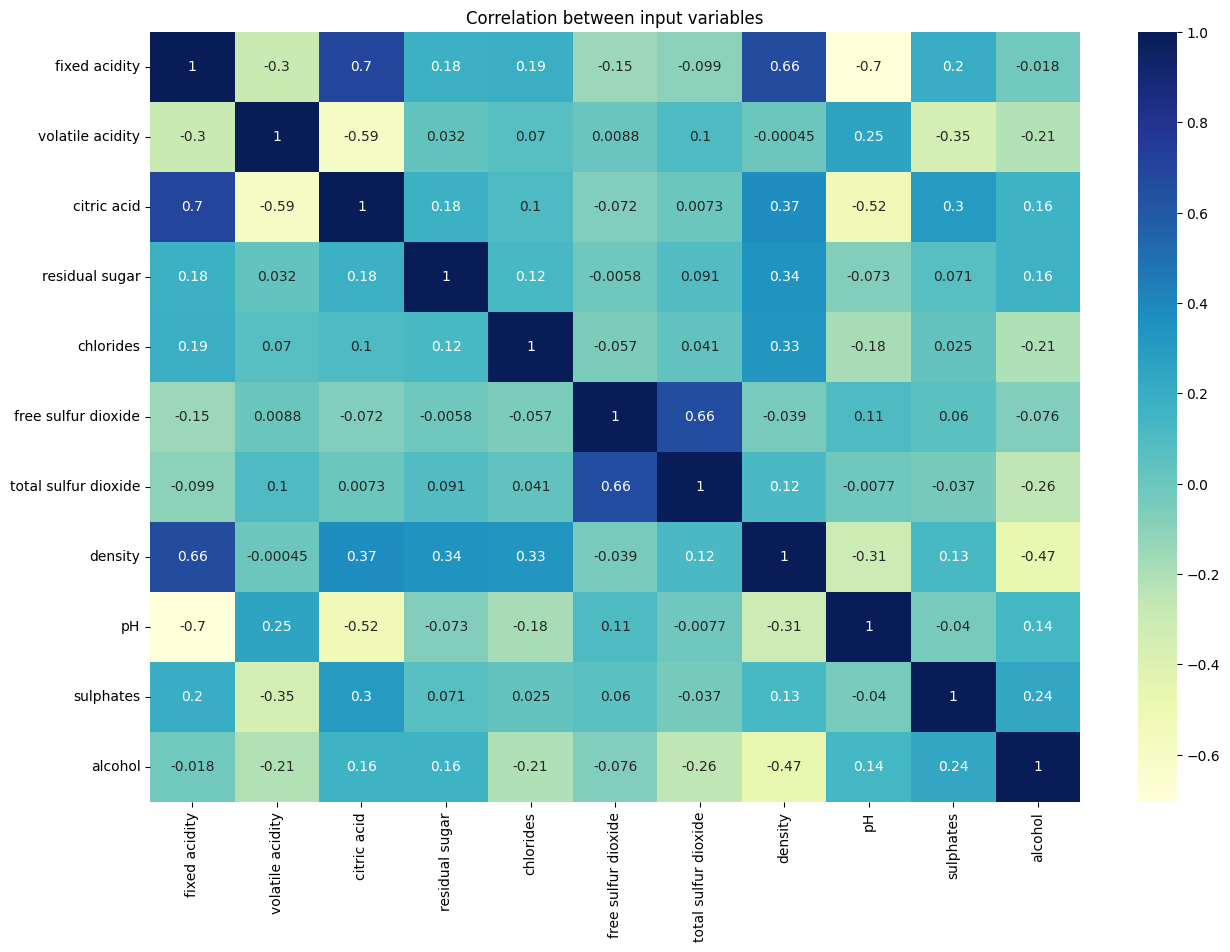

In [23]:
plt.figure(figsize=(15,10))
plt.title('Correlation between input variables', loc= 'center')
sns.heatmap(df[input_colums].corr(),annot = True, cmap= 'YlGnBu')
plt.show()

In [25]:
x=df[input_columns]
y=pd.DataFrame(target)

In [26]:
y.drop(outlier_index, inplace = True)

In [27]:
y.reset_index(drop =True, inplace = True)

In [28]:
y.shape

(1458, 1)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.20,random_state=42,stratify=y)

In [31]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1166, 11) (1166, 1)
(292, 11) (292, 1)


In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
model = GaussianNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [34]:
y_pred = model.predict(x_test)

In [39]:
print("Accuracy score : " ,metrics.accuracy_score(y_test,y_pred))
print("Precision score : " ,metrics.precision_score(y_test,y_pred))
print("Recall score : ", metrics.recall_score(y_test,y_pred))

Accuracy score :  0.7157534246575342
Precision score :  0.7697841726618705
Recall score :  0.6772151898734177
